# Tarea 4: Web scrapping a cuenta de twitter y correspondiente analisis de sentimientos


In [1]:
# Librerias
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tweepy
import os
import csv
import pandas as pd

In [27]:
#Claves a la API
consumer_key= 'KQQzJ7HAXP9QR8ob8WR05rU07'
consumer_secret= 'aI1WFTwhIPyqwzuuHKES1sNZVQcghIPa2JDWvx5GNlHsL8NpQR'
#tokens
token_bearer= '1371865708204851203-cLmDCGOfNrNOVRFu4MwnvfCIw5xtPc'
token_secret='qJB1SBJTmPiEaloCjn121OjFWHYpbtGqcaH0UIz6Ptztn'

#autenticacion
autenticacion= tweepy.OAuthHandler(consumer_key,consumer_secret)

# insercion de los tokens de acceso
autenticacion.set_access_token(token_bearer, token_secret)
#Creacion de la conexion a la API
api = tweepy.API(autenticacion,wait_on_rate_limit=True)

In [ ]:
tweets = []

In [28]:
#busqueda de la cuenta: 
username= str(input('Ingrese un user de Twitter para scrapping: ' ))
count = 2000



Ingrese un user de Twitter para scrapping: selenagomez


In [76]:




try:
   tweets = api.user_timeline(screen_name=username, count=count)
   attributes_container = [[tweet.created_at, tweet.favorite_count,tweet.source,  tweet.text, tweet.retweet_count,tweet.lang,tweet.retweeted,tweet.id, tweet.geo
                            ] for tweet in tweets]
   columns = ["Date Created", "Number of Likes", "Source of Tweet", "Tweet", "Cantidad de respuestas", "Idioma del tweet", "Retweed?", "id_tweet", "location"]
   tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e: 
    print('Status Failed On,',str(e))








In [ ]:
tweets_df['Usuario']

In [77]:
tweets_df.head()


,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location
0,2022-07-23 01:03:04,46967,Twitter for iPhone,Thank you guys so much for all the bday love! ...,6103,en,False,1550647650067685376,None
1,2022-07-23 01:02:22,35073,Twitter for iPhone,Lol https://t.co/X7frPPmO09,2840,qst,False,1550647474586394624,None
2,2022-07-21 04:29:35,0,Twitter for iPhone,RT @rarebeauty: WE'RE COMING BRAZIL 🇧🇷🥳\n\nArr...,2571,en,False,1549974846573973504,None
3,2022-07-19 20:55:00,13728,Twitter for iPhone,New episode today! @OnlyMurdersHulu https://t....,1754,en,False,1549498060513763329,None
4,2022-07-11 17:24:03,30986,Twitter Web App,So excited for SEASON 3!!! https://t.co/Ruxgra...,3991,en,False,1546545869163442176,None


In [31]:
# Scrapping en los comentarios del tweet

name = username
tweet_id = str(input('Ingrese un id de un tweet: '))
replies=[]
for tweet in tweepy.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(1000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str==tweet_id):
            replies.append(tweet)
with open('replies_clean.csv', 'w') as f:
    csv_writer = csv.DictWriter(f, fieldnames=('user', 'text'))
    csv_writer.writeheader()
    for tweet in replies:
        row = {'user': tweet.user.screen_name, 'text': tweet.text.replace('\n', ' ')}
        csv_writer.writerow(row)


Ingrese un id de un tweet: 1550647650067685376


In [ ]:
import textblob
from textblob import TextBlob
import csv


In [32]:
data1=pd.read_csv('replies_clean.csv')

In [33]:
data1.head()

,user,text
0,Charles74047785,@selenagomez Selena Gomez are you up there was...
1,Living_Crime,@selenagomez Happy Birthday!
2,nelymrnda,@selenagomez beauty with a big heart ✨☺️💯🙏🏻 @s...
3,xhy_chzzzz,"@selenagomez I love youuu, lahaaammm!!💜💜"
4,77jano77,"@selenagomez sure, Selena, the world is still ..."


#Limpieza de datos

Luego de ya estar conectados a la API, nos ponemos en obra de limpiar la data, para hacer el correspondiente analisis de sentimientos


In [ ]:
!pip install data_patterns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 42.7 MB/s 


In [80]:
data=tweets_df

In [73]:
import datetime as dt

In [82]:
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location
0,2022-07-23 01:03:04,46967,Twitter for iPhone,Thank you guys so much for all the bday love! ...,6103,en,False,1550647650067685376,None
1,2022-07-23 01:02:22,35073,Twitter for iPhone,Lol https://t.co/X7frPPmO09,2840,qst,False,1550647474586394624,None
2,2022-07-21 04:29:35,0,Twitter for iPhone,RT @rarebeauty: WE'RE COMING BRAZIL 🇧🇷🥳\n\nArr...,2571,en,False,1549974846573973504,None
3,2022-07-19 20:55:00,13728,Twitter for iPhone,New episode today! @OnlyMurdersHulu https://t....,1754,en,False,1549498060513763329,None
4,2022-07-11 17:24:03,30986,Twitter Web App,So excited for SEASON 3!!! https://t.co/Ruxgra...,3991,en,False,1546545869163442176,None


In [83]:

data['año'] = data['Date Created'].dt.year #Obtener año
data['mes'] = tweets_df['Date Created'].dt.month #Obtener mes

In [ ]:
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location,año,mes
0,2022-07-23 20:52:50,324,Twitter for iPhone,¡Más apoyo a los sectores productivos del país...,86,es,False,1550947065710186496,None,2022,7
1,2022-07-23 20:22:11,0,Twitter for iPhone,RT @PresidenciaRD: ¡Seguimos contribuyendo con...,33,es,False,1550939351055536130,None,2022,7
2,2022-07-23 20:21:59,0,Twitter for iPhone,RT @PresidenciaRD: Los residentes en el barrio...,34,es,False,1550939302749683713,None,2022,7
3,2022-07-23 20:21:56,0,Twitter for iPhone,RT @PresidenciaRD: ¡Apoyamos a las mipymes!\n\...,16,es,False,1550939289999089664,None,2022,7
4,2022-07-23 03:19:21,1772,Twitter for iPhone,"¡Qué emoción, señores! Medalla de plata 🥈 para...",313,es,False,1550681948816900096,None,2022,7


In [ ]:
#borrar duplicados

data.drop_duplicates(inplace = True)


In [ ]:
# Exploracion de valores unicos
data['Tweet'].unique()
#Valores únicos y su frecuencia
data['Tweet'].value_counts()

¡Más apoyo a los sectores productivos del país!  A través de @PromipymeRD, entregamos RD 34.4 millones en préstamos… https://t.co/0biJw89Bqg    1
También, fuimos declarados recientemente como país en categoría 1 en riesgo de COVID-19 por el Center for Disease C… https://t.co/r7Lx00BlM2    1
Primer palazo para la construcción del Puerto de Cabo Rojo, Pedernales. #ElSurAvanza https://t.co/lDosLxtdqD                                    1
Junto a Ghada Waly (@GhadalFathiWaly), directora ejecutiva de la Oficina de las Naciones Unidas contra la Droga y e… https://t.co/yvKEoccRO6    1
Un honor coincidir con uno de los economistas más influyentes en el mundo, ganador del Premio Nobel de Economía 200… https://t.co/zzuqbHta0o    1
                                                                                                                                               ..
Cada obra que hacemos desde el Gobierno tiene el objetivo de llevar bienestar, mejor calidad de vida y generar empl… https:/

# Analisis de sentimientos

In [34]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('spanish_grammars')
nltk.download('cess_esp')
nltk.download('english_grammars')

from nltk.corpus import cess_esp as cess
cess_sents = cess.tagged_sents()
nltk.download('twitter_samples')
 




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package spanish_grammars to /root/nltk_data...
[nltk_data]   Package spanish_grammars is already up-to-date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Error loading english_grammars: Package 'english_grammars'
[nltk_data]     not found in index
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [40]:
from nltk.corpus import twitter_samples 
# obtener twits negativos y positivos
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


In [42]:
data= tweets_df

In [85]:
analyzer = SentimentIntensityAnalyzer()

data['neg'] = data['Tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['Tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['Tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['Tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

#scraping de texto

text_query = username
count = 150`

try:
  # Creation of query method using parameters
  tweets = tweepy.Cursor(api.search,q=text_query).items(count)
  # Pulling information from tweets iterable object
  tweets_list = [[tweet.created_at, tweet.text] for tweet in tweets]
  # Creation of dataframe from tweets lis
  # Add or remove columns as you remove tweet information
  tweets_df = pd.DataFrame(tweets_list)
  #otra informacion de tweets
  tweets= tweepy.Cursor(api.search, q=username).items(count)
  # Pulling information from tweets iterable 
  tweets_list = [[tweet.created_at, tweet.id, tweet.text, tweet.user, tweet.favorite_count] for tweet in tweets]
  # Creation of dataframe from tweets list
  tweets_df = pd.DataFrame(tweets_list)
except BaseException as e: 
    print('Status Failed On,',str(e))



In [49]:
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location,Sentimiento,neg,neu,pos,compound
0,2022-07-23 01:03:04,46922,Twitter for iPhone,Thank you guys so much for all the bday love! ...,6096,en,False,1550647650067685376,None,No especificado,0.0,0.684,0.316,0.8655
1,2022-07-23 01:02:22,35048,Twitter for iPhone,Lol https://t.co/X7frPPmO09,2837,qst,False,1550647474586394624,None,No especificado,0.0,0.263,0.737,0.4215
2,2022-07-21 04:29:35,0,Twitter for iPhone,RT @rarebeauty: WE'RE COMING BRAZIL 🇧🇷🥳\n\nArr...,2570,en,False,1549974846573973504,None,Positivo,0.0,1.000,0.000,0.0000
3,2022-07-19 20:55:00,13724,Twitter for iPhone,New episode today! @OnlyMurdersHulu https://t....,1753,en,False,1549498060513763329,None,Positivo,0.0,1.000,0.000,0.0000
4,2022-07-11 17:24:03,30984,Twitter Web App,So excited for SEASON 3!!! https://t.co/Ruxgra...,3991,en,False,1546545869163442176,None,No especificado,0.0,0.583,0.417,0.5528


In [ ]:
data1.head()

,user,text
0,edwan_velez,@luisabinader A si mismo presidente orgullo nuestro
1,Francis32275644,"@luisabinader Si cuándo ganan son orgullo dominicano, mientras tanto nadie se acuerda de los deportistas en el dia a día Dominicano."
2,AlejandrohdezR0,@luisabinader Qué dirá @GPelliccione ahora
3,HerediaMas,@luisabinader Orgullosamente Dominicanos
4,marquezgautier1,"@luisabinader Siga dándole la espalda al pueblo, y abrazando agendas globalistas q perjudica al país, No esperaba menos."


In [44]:
import numpy as np
condiciones= [(data['neg']==1),(data['neu']==1), (data['pos']==1),(data['compound']==1)]
resulta= ['Negativo', 'Positivo', 'Neutral', 'Compuesto']
data['Sentimiento'] = np.select(condiciones, resulta, default='No especificado')
data=data.drop(columns=['neg','pos','neu','compound'])

In [45]:
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location,Sentimiento
0,2022-07-23 01:03:04,46922,Twitter for iPhone,Thank you guys so much for all the bday love! ...,6096,en,False,1550647650067685376,None,No especificado
1,2022-07-23 01:02:22,35048,Twitter for iPhone,Lol https://t.co/X7frPPmO09,2837,qst,False,1550647474586394624,None,No especificado
2,2022-07-21 04:29:35,0,Twitter for iPhone,RT @rarebeauty: WE'RE COMING BRAZIL 🇧🇷🥳\n\nArr...,2570,en,False,1549974846573973504,None,Positivo
3,2022-07-19 20:55:00,13724,Twitter for iPhone,New episode today! @OnlyMurdersHulu https://t....,1753,en,False,1549498060513763329,None,Positivo
4,2022-07-11 17:24:03,30984,Twitter Web App,So excited for SEASON 3!!! https://t.co/Ruxgra...,3991,en,False,1546545869163442176,None,No especificado


Sentimiento
No especificado    115
Positivo            84
dtype: int64


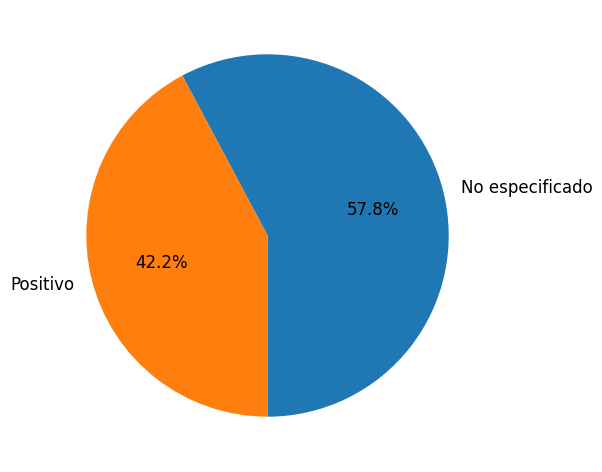

In [50]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = data.groupby(['Sentimiento']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [ ]:
data1.head(2)

,user,text
0,edwan_velez,@luisabinader A si mismo presidente orgullo nuestro
1,Francis32275644,"@luisabinader Si cuándo ganan son orgullo dominicano, mientras tanto nadie se acuerda de los deportistas en el dia a día Dominicano."


In [53]:
analyzer = SentimentIntensityAnalyzer()

data1['neg'] = data1['text'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data1['neu'] = data1['text'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data1['pos'] = data1['text'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data1['compound'] = data1['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

#scraping de texto

text_query = '#'+username
count = 150

try:
  # Creation of query method using parameters
  tweets = tweepy.Cursor(api.search,q=text_query).items(count)
  # Pulling information from tweets iterable object
  tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
  # Creation of dataframe from tweets lis
  # Add or remove columns as you remove tweet information
  tweets_df = pd.DataFrame(tweets_list)
  #otra informacion de tweets
  tweets= tweepy.Cursor(api.search, q=username).items(count)
  # Pulling information from tweets iterable 
  tweets_list = [[tweet.created_at, tweet.id, tweet.text, tweet.user, tweet.favorite_count] for tweet in tweets]
  # Creation of dataframe from tweets list
  tweets_df = pd.DataFrame(tweets_list)
except BaseException as e: 
    print('Status Failed On,',str(e))

In [55]:
import numpy as np
condiciones= [(data1['neg']>0) & (data1['neu']<data1['neg']), (data1['pos']>0) ,(data1['compound']==1)]
resulta= ['Negativo', 'Positivo',  'Compuesto']
data1['Sentimiento'] = np.select(condiciones, resulta, default='Neutral')


In [54]:
data1.head()

,user,text,neg,neu,pos,compound
0,Charles74047785,@selenagomez Selena Gomez are you up there was...,0.0,0.865,0.135,0.3612
1,Living_Crime,@selenagomez Happy Birthday!,0.0,0.334,0.666,0.6114
2,nelymrnda,@selenagomez beauty with a big heart ✨☺️💯🙏🏻 @s...,0.0,0.612,0.388,0.5859
3,xhy_chzzzz,"@selenagomez I love youuu, lahaaammm!!💜💜",0.0,0.385,0.615,0.6988
4,77jano77,"@selenagomez sure, Selena, the world is still ...",0.0,0.625,0.375,0.8398


Sentimiento
Negativo      1
Neutral     116
Positivo    315
dtype: int64


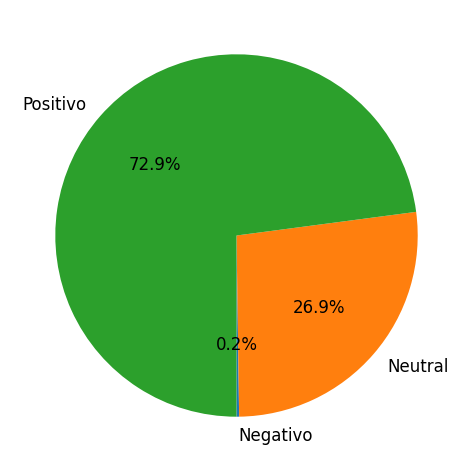

In [56]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = data1.groupby(['Sentimiento']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data1.head()

,user,text,neu,Sentimiento,neg,pos,compound
0,edwan_velez,@luisabinader A si mismo presidente orgullo nuestro,1.000,Neutral,0.000,0.0,0.000
1,Francis32275644,"@luisabinader Si cuándo ganan son orgullo dominicano, mientras tanto nadie se acuerda de los deportistas en el dia a día Dominicano.",1.000,Neutral,0.000,0.0,0.000
2,AlejandrohdezR0,@luisabinader Qué dirá @GPelliccione ahora,1.000,Neutral,0.000,0.0,0.000
3,HerediaMas,@luisabinader Orgullosamente Dominicanos,1.000,Neutral,0.000,0.0,0.000
4,marquezgautier1,"@luisabinader Siga dándole la espalda al pueblo, y abrazando agendas globalistas q perjudica al país, No esperaba menos.",0.872,Neutral,0.128,0.0,-0.296


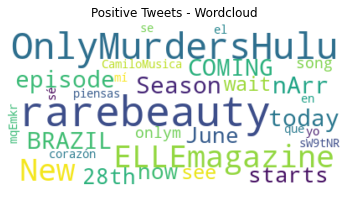

In [57]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = data['Tweet'][data["Sentimiento"] == 'Positivo']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
#negative_tweets = data['Tweet'][data["Sentimiento"] == 'Neutral']
#stop_words = ["https", "co", "RT"] + list(STOPWORDS)
#negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
#plt.figure()
#plt.title("Negative Tweets - Wordcloud")
#plt.axis("off")
#plt.show()

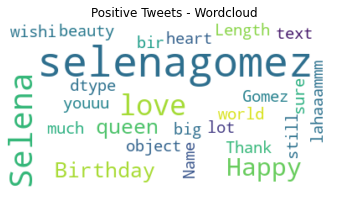

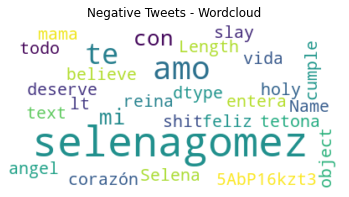

In [58]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = data1['text'][data1["Sentimiento"] == 'Positivo']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = data1['text'][data1["Sentimiento"] == 'Neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
muestra= data1.sample(10)
muestra.head(1)

,user,text,neg,neu,pos,compound,Sentimiento
317,SelenaNigeria,@selenagomez We love you Queen.,0.0,0.488,0.512,0.6369,Positivo


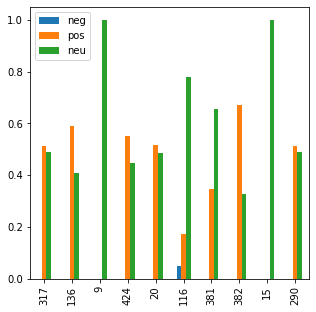

In [97]:
muestra[['neg','pos','neu']].plot(kind = 'bar', figsize=(5,5))


In [63]:
muestra1=data.sample(10)

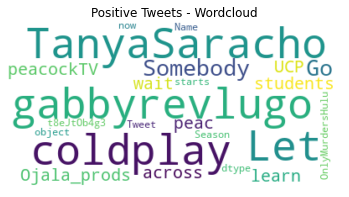

In [64]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = muestra1['Tweet'][muestra1["Sentimiento"] == 'Positivo']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
#negative_tweets = muestra1['Tweet'][muestra1["Sentimiento"] == 'Compuesto']
#stop_words = ["https", "co", "RT"] + list(STOPWORDS)
#negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
#plt.figure()
#plt.title("Negative Tweets - Wordcloud")
#plt.imshow(negative_wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

In [ ]:
data.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location,año,mes,Sentimiento,neg,neu,pos,compound
0,2022-07-23 20:52:50,324,Twitter for iPhone,"¡Más apoyo a los sectores productivos del país! A través de @PromipymeRD, entregamos RD 34.4 millones en préstamos… https://t.co/0biJw89Bqg",86,es,False,1550947065710186496,None,2022,7,Positivo,0.0,1.0,0.0,0.0
1,2022-07-23 20:22:11,0,Twitter for iPhone,"RT @PresidenciaRD: ¡Seguimos contribuyendo con el bienestar de nuestra gente! \n\nLos residentes de Copeyito y San Rafael, en la provincia Ma…",33,es,False,1550939351055536130,None,2022,7,Positivo,0.0,1.0,0.0,0.0
2,2022-07-23 20:21:59,0,Twitter for iPhone,"RT @PresidenciaRD: Los residentes en el barrio Las 500, en el municipio de #Nagua, ya cuentan con un polideportivo: obra que contribuye al…",34,es,False,1550939302749683713,None,2022,7,Positivo,0.0,1.0,0.0,0.0
3,2022-07-23 20:21:56,0,Twitter for iPhone,RT @PresidenciaRD: ¡Apoyamos a las mipymes!\n\nEntregamos un monto de RD 34.4 millones en préstamos a 227 micro y pequeños empresarios de la…,16,es,False,1550939289999089664,None,2022,7,Positivo,0.0,1.0,0.0,0.0
4,2022-07-23 03:19:21,1772,Twitter for iPhone,"¡Qué emoción, señores! Medalla de plata 🥈 para Marileidy Paulino en el Mundial de Atletismo. Nos sentimos felices d… https://t.co/t7C96qwQO9",313,es,False,1550681948816900096,None,2022,7,Positivo,0.0,1.0,0.0,0.0


Sentimiento
No especificado    4
Positivo           6
dtype: int64


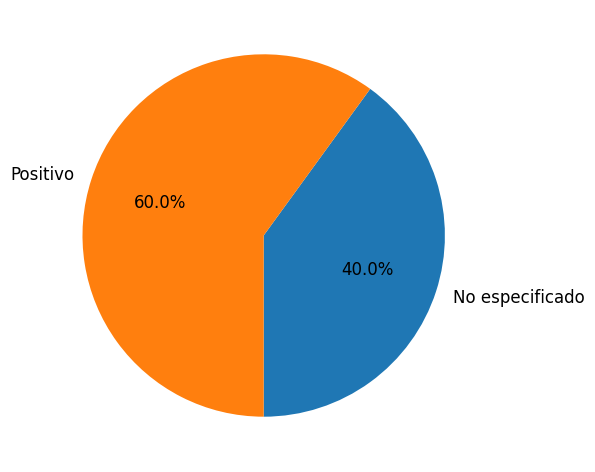

In [65]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = muestra1.groupby(['Sentimiento']).size()
print(sentiment_counts)


# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [69]:
import plotly.express as px


In [87]:
fig = px.line(data, x="año", y="neg", title='Sentimientos negativos a lo largo del tiempo')
fig.show()

In [92]:
fig = px.scatter(data, x="mes", y="pos", color="Idioma del tweet",
                 size='Number of Likes', hover_data=['neg'], title='Sentimientos positivos segun el mes e idioma del tweet')
fig.show()

In [94]:
fig = px.bar(data, x="Source of Tweet", y="Number of Likes") 
  
# showing the plot
fig.show()


In [88]:
data.columns


Index(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet',
       'Cantidad de respuestas', 'Idioma del tweet', 'Retweed?', 'id_tweet',
       'location', 'año', 'mes', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [66]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [ ]:
data.head(10)

,Date Created,Number of Likes,Source of Tweet,Tweet,Cantidad de respuestas,Idioma del tweet,Retweed?,id_tweet,location,año,mes,Sentimiento,neg,neu,pos,compound
0,2022-07-23 20:52:50,324,Twitter for iPhone,"¡Más apoyo a los sectores productivos del país! A través de @PromipymeRD, entregamos RD 34.4 millones en préstamos… https://t.co/0biJw89Bqg",86,es,False,1550947065710186496,None,2022,7,Positivo,0.0,1.0,0.0,0.0
1,2022-07-23 20:22:11,0,Twitter for iPhone,"RT @PresidenciaRD: ¡Seguimos contribuyendo con el bienestar de nuestra gente! \n\nLos residentes de Copeyito y San Rafael, en la provincia Ma…",33,es,False,1550939351055536130,None,2022,7,Positivo,0.0,1.0,0.0,0.0
2,2022-07-23 20:21:59,0,Twitter for iPhone,"RT @PresidenciaRD: Los residentes en el barrio Las 500, en el municipio de #Nagua, ya cuentan con un polideportivo: obra que contribuye al…",34,es,False,1550939302749683713,None,2022,7,Positivo,0.0,1.0,0.0,0.0
3,2022-07-23 20:21:56,0,Twitter for iPhone,RT @PresidenciaRD: ¡Apoyamos a las mipymes!\n\nEntregamos un monto de RD 34.4 millones en préstamos a 227 micro y pequeños empresarios de la…,16,es,False,1550939289999089664,None,2022,7,Positivo,0.0,1.0,0.0,0.0
4,2022-07-23 03:19:21,1772,Twitter for iPhone,"¡Qué emoción, señores! Medalla de plata 🥈 para Marileidy Paulino en el Mundial de Atletismo. Nos sentimos felices d… https://t.co/t7C96qwQO9",313,es,False,1550681948816900096,None,2022,7,Positivo,0.0,1.0,0.0,0.0
5,2022-07-23 01:14:40,1306,Twitter for iPhone,"Aplaudo la mediación de Turquía @RTErdogan y la ONU @antonioguterres en la firma del pacto entre Rusia y Ucrania, q… https://t.co/PM2CpDlRTO",319,es,False,1550650571933339651,None,2022,7,Positivo,0.0,1.0,0.0,0.0
6,2022-07-21 22:22:46,468,Twitter Media Studio,https://t.co/cSf2pQd9oE,149,zxx,False,1550244923349278721,None,2022,7,Positivo,0.0,1.0,0.0,0.0
7,2022-07-21 17:42:27,184,Twitter for iPhone,"Con la construcción del puerto turístico Samaná Bayport, la República Dominicana se pone a la vanguardia de la ofer… https://t.co/1eefphGgT0",42,es,False,1550174379019046912,None,2022,7,Positivo,0.0,1.0,0.0,0.0
8,2022-07-21 17:41:33,186,Twitter for iPhone,"Durante este proceso de construcción, en el que se invertirán 22 millones de dólares, se generarán más de 150 emple… https://t.co/f7XdAx79k2",42,es,False,1550174153893986304,None,2022,7,Positivo,0.0,1.0,0.0,0.0
9,2022-07-21 17:41:10,178,Twitter for iPhone,"Este puerto de Samaná tendrá la capacidad de operar tres cruceros de hasta 5,000 pasajeros de forma simultánea; con… https://t.co/gt2ajxnCpC",46,es,False,1550174054430248962,None,2022,7,Positivo,0.0,1.0,0.0,0.0


In [ ]:
tweet=str(input('Ingrese el id del tweet: '))

Ingrese el id del tweet: 1550174054430248962	


In [ ]:
#funcion para hacer el scrapping
def twitter_scrap(user):
  autenticacion= tweepy.OAuthHandler(consumer_key,consumer_secret)
  
  # insercion de los tokens de acceso
  autenticacion.set_access_token(token_bearer, token_secret)
  #Creacion de la conexion a la API
  api = tweepy.API(autenticacion,wait_on_rate_limit=True)
  cantidad= 250
  tweets= []
  for tweet in tweepy.Cursor(api.user_timeline, screen_name = user).items(cantidad):
    tweets.append([username, tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")])

#conversion a csv
  data_salida= username + "_tweets.csv"
  print('La salida seria:' + data_salida)
  with open(data_salida, 'w+') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(tweets)


#Aqui termino la funcion

#Definir un usuario
usuarios= ['Katy Perry', 'Demi Lovato']
#Bucle donde se usa la funcion
for usuario in usuarios:
  twitter_scrap(usuarios)


La salida seria:luisabinader_tweets.csv
La salida seria:luisabinader_tweets.csv


In [ ]:
aprue=twitter_scrap(usuarios)

La salida seria:luisabinader_tweets.csv


In [ ]:
import pandas as pd
a=pd.DataFrame(aprue)

In [ ]:
a.head()

""
